# Plotting on original grid with cartopy

If you would like to try to repeat examples from this notebook, you can download FESOM2 data and mesh. The data are quite heavy, about 15 Gb.

Link: https://swiftbrowser.dkrz.de/public/dkrz_c719fbc3-98ea-446c-8e01-356dac22ed90/PYFESOM2/

You have to download both archives (`LCORE.tar` and `LCORE_MESH.tar`) and extract them. 

Alternative would be to use very light weight mesh that comes with pyfesom2 in the `tests/data/pi-grid/` and example data on this mesh in `tests/data/pi-results`.

## Warning

Current version is still quite buggy, so don't expect that thing are running ery smothly :) Please submit bug reports to: 

In [57]:
import pyfesom2 as pf
import matplotlib.cm as cm

In [2]:
mesh = pf.load_mesh('../../DATA/LCORE_MESH/', abg=[50, 15, -90])

/Users/nkolduno/PYTHON/DATA/LCORE_MESH/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/LCORE_MESH/pickle_mesh_py3_fesom2


In [3]:
data_path = '../../DATA/LCORE/'

First load the data on the surface layer

In [58]:
data = pf.get_data(data_path, "temp", [1948, 1949], mesh, how="mean", compute=True, depth=0)

Model depth: 0.0


Minimum input is mesh and data 

CPU times: user 526 ms, sys: 6.03 ms, total: 532 ms
Wall time: 530 ms


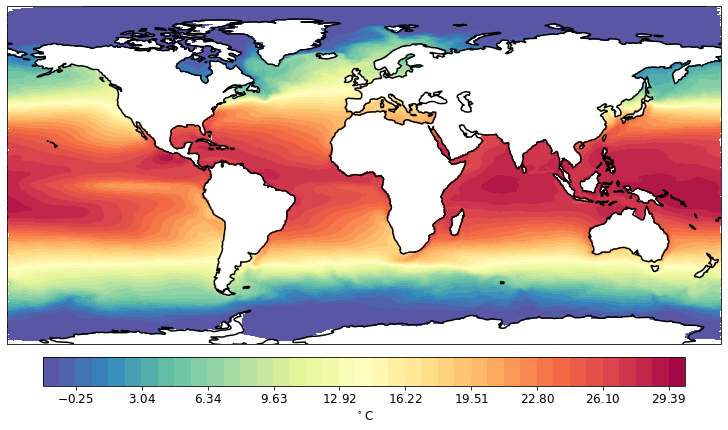

In [59]:
%%time
pf.tplot(mesh, data)

You can provide several data arrays as an input. You should specify `rowcol` variable then, to define how the output will be arranged.

CPU times: user 973 ms, sys: 8.87 ms, total: 982 ms
Wall time: 981 ms


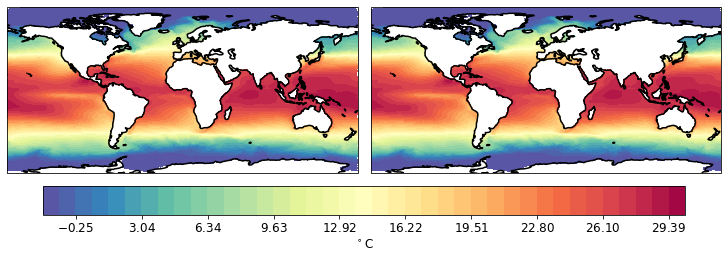

In [60]:
%%time
pf.tplot(mesh, [data, data], rowscol=(1,2))

One can plot smallare resion by specifying the `box`.

TODO:
 - This does not work with standard `pc` at the moment (at least if the southern boundary is above the equator)
 - With `merc` projection only properly works untill 84N. Then show artefacts. 

CPU times: user 86.9 ms, sys: 2.23 ms, total: 89.1 ms
Wall time: 87.3 ms


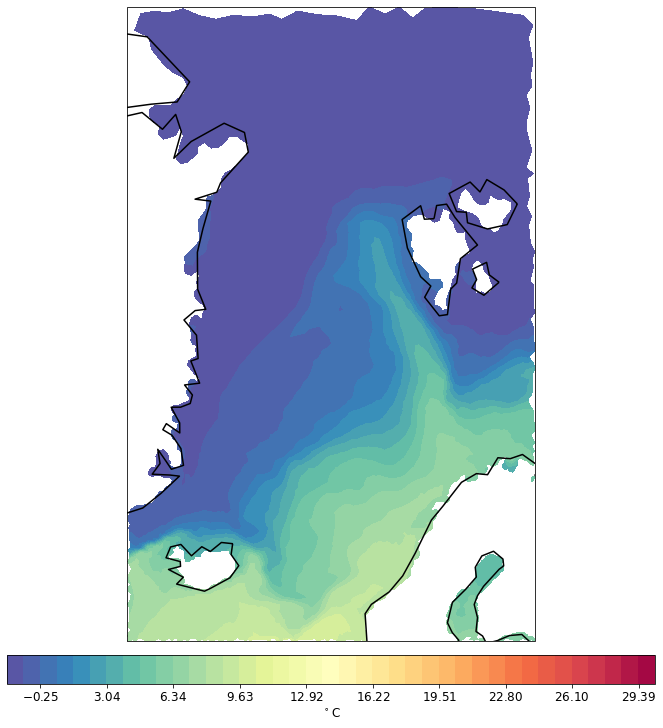

In [64]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-30, 30, 60, 84], mapproj='merc')

Instead of `cf` (tricontourf), one can change to the `tri` (tripcolor) plot.

TODO
- This works with both `merc` and `pc`, and one can set the northern limit to 90.

CPU times: user 4.01 s, sys: 30.4 ms, total: 4.04 s
Wall time: 3.85 s


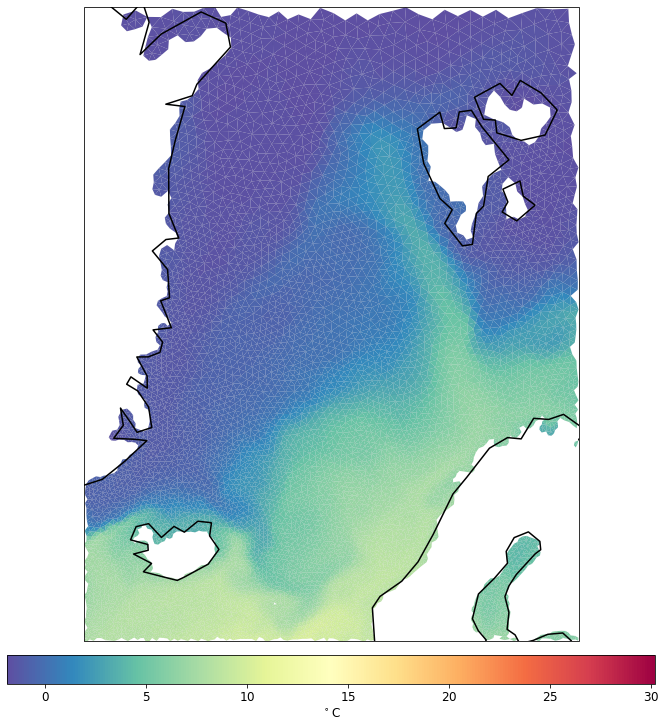

In [68]:
%%time
pf.tplot(mesh, data, ptype='tri', box=[-30, 30, 60, 82], mapproj='merc')

To highlight the mesh structire more, you can change the `lw` parameter.

CPU times: user 3.85 s, sys: 19.6 ms, total: 3.87 s
Wall time: 3.69 s


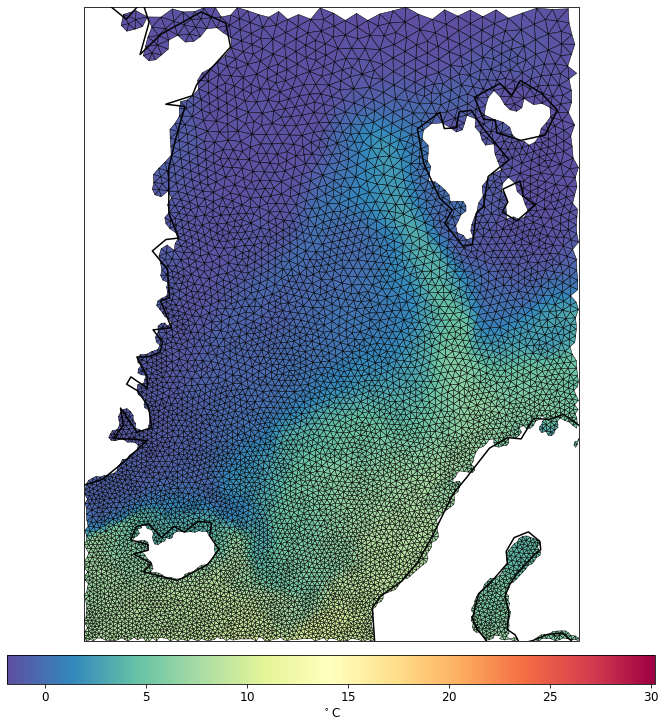

In [69]:
%%time
pf.tplot(mesh, data, ptype='tri', box=[-30, 30, 60, 82], mapproj='merc', lw=0.5)

Let's try different depth

In [70]:
data = pf.get_data(data_path, "temp", [1948, 1949], mesh, how="mean", compute=True, depth=2000)

Model depth: 1920.0


TODO:

 - NaNs do not work for tri* functions somehow. We had to put the empty nodes to -99999.
 - For `tripcolor` this leads to filling of NaNs by the same color.
 - One has to specify the range manually. 

CPU times: user 3.77 s, sys: 16.7 ms, total: 3.78 s
Wall time: 3.6 s


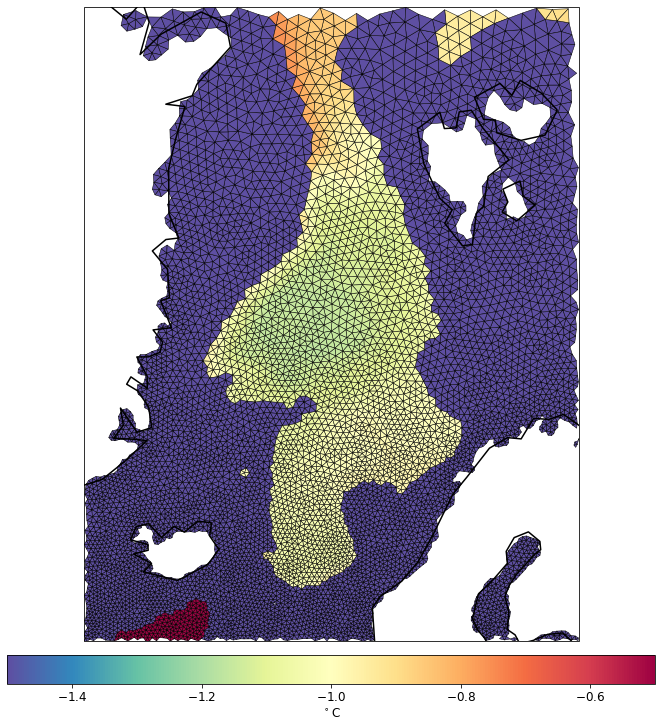

In [75]:
%%time
pf.tplot(mesh, data, ptype='tri', box=[-30, 30, 60, 82], mapproj='merc', lw=0.5, levels=(-1.5, -0.5, 41))

TODO:

- For `cf` the NaNs (which are set to -9999) are not plotted, but one has to be again careful with specifying the range. 

CPU times: user 85.6 ms, sys: 4.81 ms, total: 90.4 ms
Wall time: 88.4 ms


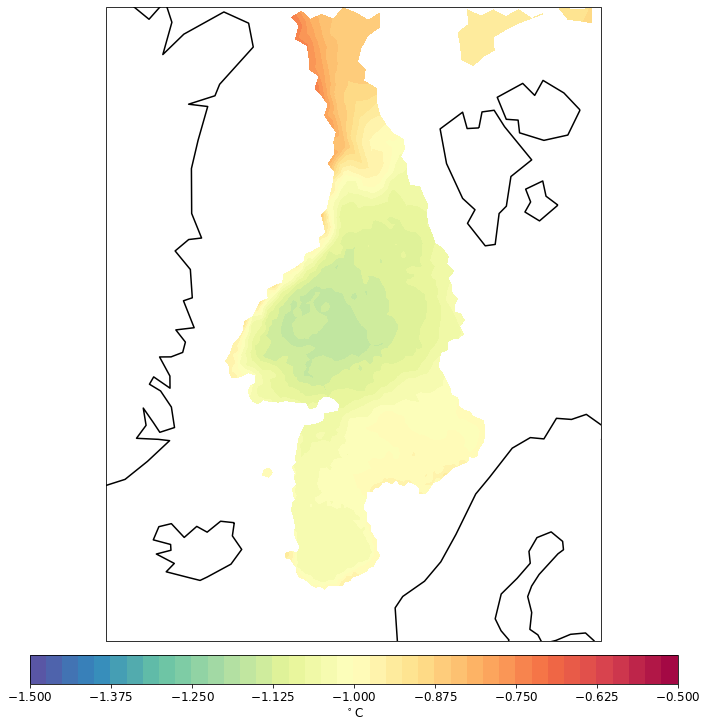

In [46]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-30, 30, 60, 82], mapproj='merc', lw=0.5, levels=(-1.5, -0.5, 41))

North polar stereo projection:

CPU times: user 187 ms, sys: 3.46 ms, total: 191 ms
Wall time: 190 ms


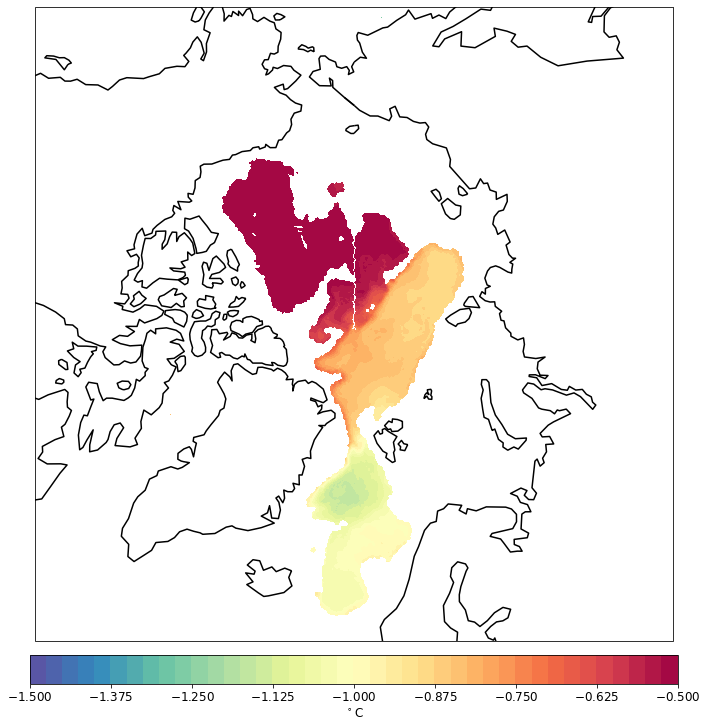

In [49]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-180, 180, 60, 90], mapproj='np', lw=0.5, levels=(-1.5, -0.5, 41))

Also for the different depth.

TODO:

- With Basemap it was possible to get rid of the line along 180 (by not using no_cyclic_elem). Now we have to live with it.

In [80]:
data = pf.get_data(data_path, "temp", [1948, 1949], mesh, how="mean", compute=True, depth=100)

Model depth: 100.0


minimum level changed to make cartopy happy
CPU times: user 164 ms, sys: 3.55 ms, total: 168 ms
Wall time: 166 ms


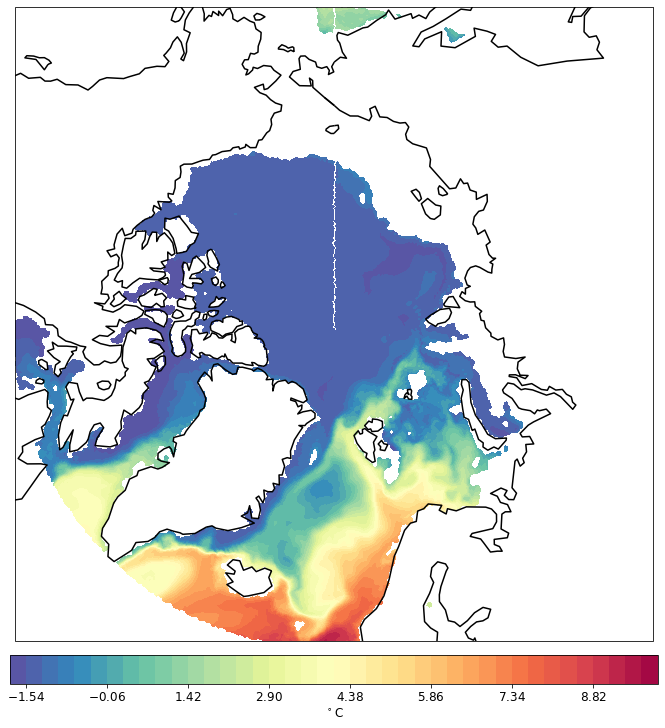

In [81]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-180, 180, 60, 90], mapproj='np', lw=0.5, levels=(-2, 10, 41))

The South is working as well.

CPU times: user 165 ms, sys: 3.33 ms, total: 168 ms
Wall time: 167 ms


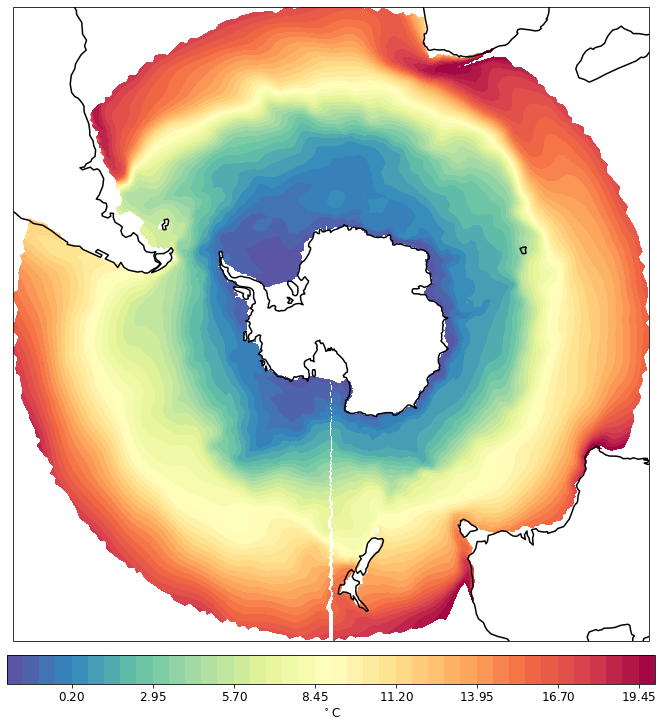

In [83]:
%%time
pf.tplot(mesh, data, ptype='cf', box=[-180, 180, -90, -30], mapproj='sp', lw=0.5, levels=(-2, 20, 41))